# Homework 11, Artificial Neural Networks
# Matt Briskey

### 1. Why is it generally preferable to use a Logistic Regression classifier rather than a classical Perceptron (i.e., a single layer of threshold logic units trained using the Perceptron training algorithm)? How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier?

A classic perceptron has some limitations such as needing linearly seperable data to converge and only being able to compute binary outputs. The logistic regression classifier, however, is able to converge on non-linear data and outputs class probabilities (as opposed to binary outputs).

If you wanted to tweak the Perceptron to make it like a logistic regression classifier you can do so by changing the activation function to the softmax or the sigmoid function and train it using gradient descent or some other optimization algorithm.

### 2. Can you list all the hyperparameters you can tweak in a basic MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?

There are a few hyperparameters you can tweak in a basic MLP:
1. The number of hidden layers
2. The number of neurons in each hidden layer
3. The activation function used

To combat an MLP that overfits the training data, we could reduce the number of hidden layers or number of neurons in each layer.

### 3. Train a deep MLP on the MNIST dataset (you can load it using keras.datasets.mnist.load_data(). See what accuracy you can get. Try searching for the optimal learning rate. 
*The MNIST dataset is a set of 70,000 small images of digits handwritten (0-9) by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. There are 70,000 images, and each image has 784 features. This is because each image is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).*

In [1]:
import tensorflow as tf
from tensorflow import keras


C:\Users\16145\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#show the version of TensorFlow
tf.__version__

'2.13.0'

In [3]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
# Look at the range of values in X
X_train_full.min(), X_train_full.max()

(0, 255)

In [7]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
# we pick 5000 samples for validation
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

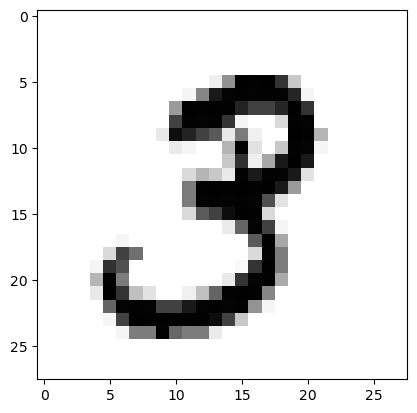

In [9]:
import matplotlib.pyplot as plt

plt.imshow(X_train[1], cmap='Greys')

In [10]:
class_names = ["Zero", "One", "Two", "Three", "Four",
               "Five", "Six", "Seven", "Eight", "Nine"]

In [11]:
# let's check the class of the first training sample
class_names[y_train[1]]

'Three'

In [12]:
X_train.shape

(55000, 28, 28)

In [13]:
X_train[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [14]:
# Create Kerar Model object to which we will add the layers
model = keras.models.Sequential()

# Input Layer
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# Hidden Layers
model.add(keras.layers.Dense(300, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="sigmoid"))

# Output Layer
model.add(keras.layers.Dense(len(class_names), activation="softmax"))


model(X_train[:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.05331184, 0.15140143, 0.06634748, 0.15426573, 0.13551839,
        0.1090892 , 0.09721219, 0.10613447, 0.04578791, 0.08093134]],
      dtype=float32)>

In [15]:
# displays all the model’s layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 238,620
Trainable params: 238,620
Non-trainable params: 0
_________________________________________________________________


In [16]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [18]:
model(X_train[:2]).numpy()

array([[0.05331184, 0.15140145, 0.06634748, 0.15426573, 0.1355184 ,
        0.1090892 , 0.09721221, 0.10613447, 0.04578791, 0.08093134],
       [0.05399775, 0.14695753, 0.06965683, 0.15827909, 0.13038895,
        0.11105763, 0.0934393 , 0.10533876, 0.04733537, 0.08354886]],
      dtype=float32)

In [19]:
from keras.callbacks import EarlyStopping

In [20]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_valid, y_valid),
                    )

Epoch 1/20
1719/1719 [==============================] - 2s 1ms/step - loss: 2.2136 - accuracy: 0.2673 - val_loss: 2.0680 - val_accuracy: 0.4948
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 1.8538 - accuracy: 0.5206 - val_loss: 1.6180 - val_accuracy: 0.5740
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 1.4555 - accuracy: 0.5917 - val_loss: 1.2981 - val_accuracy: 0.6220
Epoch 4/20
1719/1719 [==============================] - 3s 1ms/step - loss: 1.2011 - accuracy: 0.6546 - val_loss: 1.0930 - val_accuracy: 0.6920
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 1.0269 - accuracy: 0.7218 - val_loss: 0.9424 - val_accuracy: 0.7656
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.8944 - accuracy: 0.7767 - val_loss: 0.8239 - val_accuracy: 0.8000
Epoch 7/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7911 - accuracy: 0.8094 - val_loss: 0.7313 - val_accuracy:

In [21]:
import pandas as pd
df = pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,2.213574,0.267309,2.067996,0.4948
1,1.853781,0.520636,1.618043,0.5740
2,1.455528,0.591709,1.298052,0.6220
3,1.201136,0.654618,1.092952,0.6920
4,1.026862,0.721782,0.942421,0.7656
5,0.894357,0.776709,0.823857,0.8000
6,0.791075,0.809382,0.731315,0.8268
7,0.711877,0.827127,0.662799,0.8432
8,0.650926,0.838109,0.606764,0.8518
9,0.602964,0.847673,0.564247,0.8632


<AxesSubplot:>

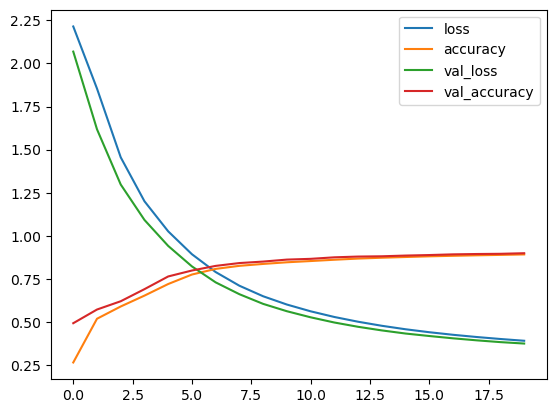

In [22]:
df.plot()

In [23]:
import numpy as np

In [24]:
model(X_train[:1]).numpy()

array([[5.0358218e-04, 1.2219236e-01, 1.3406384e-01, 2.5081184e-02,
        6.2558949e-03, 6.1096228e-04, 7.8248553e-04, 6.0803592e-01,
        9.8965690e-03, 9.2577145e-02]], dtype=float32)

In [25]:
# make prediction
X_new = X_test[:10]
y_pred_prob = model.predict(X_new)
y_pred = np.argmax(y_pred_prob, axis=0)
#y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 60ms/step


array([3, 2, 1, 7, 6, 3, 8, 0, 9, 7], dtype=int64)

In [26]:
import numpy as np

np.array(class_names)[y_pred]

array(['Three', 'Two', 'One', 'Seven', 'Six', 'Three', 'Eight', 'Zero',
       'Nine', 'Seven'], dtype='<U5')

In [27]:
# check the labels
y_new = y_test[:10]
np.array(class_names)[y_new]

array(['Seven', 'Two', 'One', 'Zero', 'Four', 'One', 'Four', 'Nine',
       'Five', 'Nine'], dtype='<U5')

In [28]:
y_pred

array([3, 2, 1, 7, 6, 3, 8, 0, 9, 7], dtype=int64)

True class: Two
Predicted class: Two
Certianty: 0.96719325


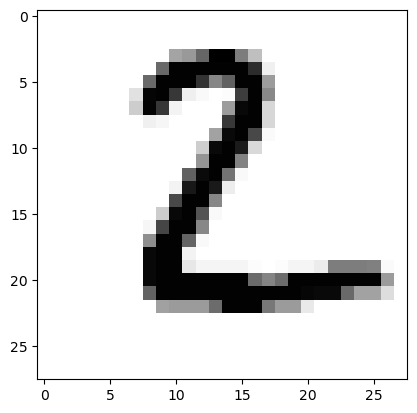

In [29]:
i = 1

print('True class:', class_names[y_test[i]])
print('Predicted class:', class_names[y_pred[i]])
print('Certianty:', y_pred_prob[i].max())

plt.imshow(X_test[i], cmap='Greys')

In [30]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import ParameterGrid

In [31]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def make_model(layers, optimizer):
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=[28, 28]))

  for size in layers:
    model.add(keras.layers.Dense(size, activation="relu"))

  model.add(keras.layers.Dense(10, activation="softmax"))


  model.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"])

  return model


cls = KerasClassifier(build_fn=make_model)


param_grid = {
    'layers': [[10], [20], [300, 10]],
    'optimizer': ['sgd', 'adam'],
}

results = list()
for params in ParameterGrid(param_grid=param_grid):
  cls.set_params(**params)

  print(params)

  print('Training...')
  history = cls.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[EarlyStopping(verbose=1)], verbose=0)

  df = pd.DataFrame(history.history)

  print('Val Loss:', history.history['val_loss'][-1])
  print('Val Acc: ', history.history['val_accuracy'][-1])


  results.append(df)

{'layers': [10], 'optimizer': 'sgd'}
Training...
Epoch 2: early stopping
Val Loss: 0.3439958095550537
Val Acc:  0.9071999788284302
{'layers': [10], 'optimizer': 'adam'}
Training...
Epoch 2: early stopping
Val Loss: 0.30821558833122253
Val Acc:  0.9175999760627747
{'layers': [20], 'optimizer': 'sgd'}
Training...
Epoch 2: early stopping
Val Loss: 0.32407432794570923
Val Acc:  0.9103999733924866
{'layers': [20], 'optimizer': 'adam'}
Training...
Epoch 2: early stopping
Val Loss: 0.2172568142414093
Val Acc:  0.9377999901771545
{'layers': [300, 10], 'optimizer': 'sgd'}
Training...
Epoch 2: early stopping
Val Loss: 0.27835339307785034
Val Acc:  0.9241999983787537
{'layers': [300, 10], 'optimizer': 'adam'}
Training...
Epoch 2: early stopping
Val Loss: 0.08990192413330078
Val Acc:  0.975600004196167


In [32]:
import pandas as pd

pd.concat(results)

,loss,accuracy,val_loss,val_accuracy
0,0.918780,0.731964,0.450621,0.8802
1,0.411581,0.886000,0.343996,0.9072
0,0.613916,0.813855,0.348715,0.9042
1,0.334681,0.906218,0.308216,0.9176
0,0.720738,0.813982,0.389961,0.8968
1,0.375063,0.894200,0.324074,0.9104
0,0.431047,0.879200,0.250458,0.9288
1,0.236902,0.932891,0.217257,0.9378
0,0.840809,0.762218,0.388294,0.8918
1,0.344354,0.905509,0.278353,0.9242
